# Cylindrical Lens Lightsheet PSF 可视化

本 notebook 用于可视化 cylindrical lens lightsheet 的：
1. **Excitation PSF** - 激发点扩散函数（使用圆柱透镜）
2. **Detection PSF** - 检测点扩散函数（使用普通光束）
3. **Effective PSF** - 有效点扩散函数（excitation 和 detection PSF 的乘积）


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from biobeam.core.focus_field_cylindrical import focus_field_cylindrical
from biobeam.core.focus_field_beam import focus_field_beam

# 设置参数
shape = (256, 256, 128)  # (Nx, Ny, Nz) - 注意：cylindrical lens 在 yz 平面
units = (0.1, 0.1, 0.1)  # (dx, dy, dz) 单位：微米

# 激发参数
lam_excitation = 0.488  # 激发波长（微米）
NA_excitation = 0.4      # 激发数值孔径
n0 = 1.33                # 介质折射率

# 检测参数
lam_detection = 0.525    # 检测波长（微米）
NA_detection = 0.7       # 检测数值孔径

print("参数设置完成")
print(f"形状: {shape}")
print(f"像素大小: {units} 微米")
print(f"激发: λ={lam_excitation} μm, NA={NA_excitation}")
print(f"检测: λ={lam_detection} μm, NA={NA_detection}")


参数设置完成
形状: (256, 256, 128)
像素大小: (0.1, 0.1, 0.1) 微米
激发: λ=0.488 μm, NA=0.4
检测: λ=0.525 μm, NA=0.7


## 1. 计算 Excitation PSF (Cylindrical Lens)


In [62]:
print("正在计算 Excitation PSF (Cylindrical Lens)...")
psf_excitation = focus_field_cylindrical(
    shape=shape,
    units=units,
    lam=lam_excitation,
    NA=NA_excitation,
    n0=n0,
    return_all_fields=False,
    n_integration_steps=200
)

print(f"Excitation PSF 形状: {psf_excitation.shape}")
print(f"Excitation PSF 最大值: {psf_excitation.max():.4f}")
print(f"Excitation PSF 最小值: {psf_excitation.min():.4f}")


正在计算 Excitation PSF (Cylindrical Lens)...
time in secs: 0.22529244422912598
Excitation PSF 形状: (128, 256, 256)
Excitation PSF 最大值: 0.7308
Excitation PSF 最小值: 0.0000


## 2. 计算 Detection PSF (普通光束)


In [63]:
print("正在计算 Detection PSF (普通光束)...")
psf_detection = focus_field_beam(
    shape=shape,
    units=units,
    lam=lam_detection,
    NA=NA_detection,
    n0=n0,
    return_all_fields=False,
    n_integration_steps=200
)

print(f"Detection PSF 形状: {psf_detection.shape}")
print(f"Detection PSF 最大值: {psf_detection.max():.4f}")
print(f"Detection PSF 最小值: {psf_detection.min():.4f}")


正在计算 Detection PSF (普通光束)...
Detection PSF 形状: (128, 256, 256)
Detection PSF 最大值: 0.0783
Detection PSF 最小值: 0.0000


## 3. 计算 Effective PSF


In [64]:
# Effective PSF 是 excitation 和 detection PSF 的乘积
psf_effective = psf_excitation * psf_detection

print(f"Effective PSF 形状: {psf_effective.shape}")
print(f"Effective PSF 最大值: {psf_effective.max():.4f}")
print(f"Effective PSF 最小值: {psf_effective.min():.4f}")


Effective PSF 形状: (128, 256, 256)
Effective PSF 最大值: 0.0572
Effective PSF 最小值: 0.0000


## 4. 可视化 PSF

我们将展示三个 PSF 的 2D 切片和 1D 轮廓图。


In [65]:
# 获取中心切片
# 注意：PSF 数组的形状是 (Nz, Ny, Nx)，而不是 (Nx, Ny, Nz)
Nx, Ny, Nz = shape
center_x = Nx // 2
center_y = Ny // 2
center_z = Nz // 2

# 提取不同平面的切片
# YZ 平面 (x = center_x) - 对于 cylindrical lens 这是主要平面
# PSF 形状是 (Nz, Ny, Nx)，所以 YZ 平面是 psf[:, :, center_x]
slice_yz_excitation = psf_excitation[:, :, center_x]
slice_yz_detection = psf_detection[:, :, center_x]
slice_yz_effective = psf_effective[:, :, center_x]

# XY 平面 (z = center_z)
# PSF 形状是 (Nz, Ny, Nx)，所以 XY 平面是 psf[center_z, :, :]
slice_xy_excitation = psf_excitation[center_z, :, :]
slice_xy_detection = psf_detection[center_z, :, :]
slice_xy_effective = psf_effective[center_z, :, :]

# XZ 平面 (y = center_y)
# PSF 形状是 (Nz, Ny, Nx)，所以 XZ 平面是 psf[:, center_y, :]
slice_xz_excitation = psf_excitation[:, center_y, :]
slice_xz_detection = psf_detection[:, center_y, :]
slice_xz_effective = psf_effective[:, center_y, :]

print("切片提取完成")
print(f"PSF 数组形状: {psf_excitation.shape} (Nz, Ny, Nx)")
print(f"YZ 切片形状: {slice_yz_excitation.shape} (Nz, Ny)")
print(f"XY 切片形状: {slice_xy_excitation.shape} (Ny, Nx)")
print(f"XZ 切片形状: {slice_xz_excitation.shape} (Nz, Nx)")


切片提取完成
PSF 数组形状: (128, 256, 256) (Nz, Ny, Nx)
YZ 切片形状: (128, 256) (Nz, Ny)
XY 切片形状: (256, 256) (Ny, Nx)
XZ 切片形状: (128, 256) (Nz, Nx)


In [66]:
# 创建坐标轴
dy, dz = units[1], units[2]
dx = units[0]

y_coords = np.arange(Ny) * dy - (Ny // 2) * dy
z_coords = np.arange(Nz) * dz - (Nz // 2) * dz
x_coords = np.arange(Nx) * dx - (Nx // 2) * dx

# 可视化函数
def plot_psf_slice(slice_data, title, coords1, coords2, label1, label2, vmax=None):
    """绘制 PSF 切片的 2D 图像"""
    fig, ax = plt.subplots(figsize=(8, 6))
    
    if vmax is None:
        vmax = slice_data.max()
    
    im = ax.imshow(slice_data, 
                   extent=[coords1.min(), coords1.max(), 
                          coords2.min(), coords2.max()],
                   origin='lower',  
                   cmap='copper',
                   vmax=vmax,
                   aspect='auto')
    
    ax.set_xlabel(f'{label1} (μm)', fontsize=12)
    ax.set_ylabel(f'{label2} (μm)', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax, label='强度')
    
    plt.tight_layout()
    return fig, ax


### 4.1 YZ 平面视图（Cylindrical Lens 的主要平面）


C:\Users\11316\AppData\Local\Temp\ipykernel_26984\2596566997.py:46: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\2596566997.py:46: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


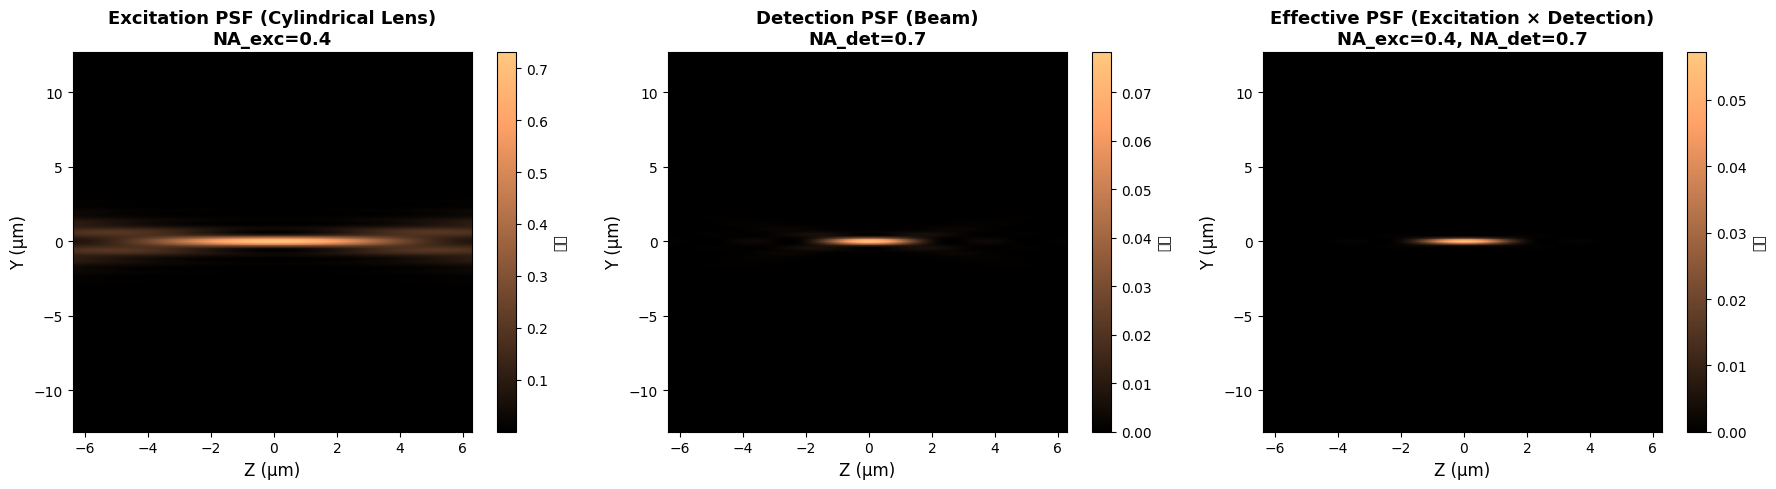

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# YZ 切片形状是 (Nz, Ny)，需要转置以便 Z 在 x 轴，Y 在 y 轴
# Excitation PSF
vmax = slice_yz_excitation.max()
im1 = axes[0].imshow(slice_yz_excitation.T,  # 转置：从 (Nz, Ny) 到 (Ny, Nz)
                     extent=[z_coords.min(), z_coords.max(),
                            y_coords.min(), y_coords.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax,
                     aspect='auto')
axes[0].set_xlabel('Z (μm)', fontsize=12)
axes[0].set_ylabel('Y (μm)', fontsize=12)
axes[0].set_title(f'Excitation PSF (Cylindrical Lens)\nNA_exc={NA_excitation}', fontsize=13, fontweight='bold')
plt.colorbar(im1, ax=axes[0], label='强度')

# Detection PSF
vmax2 = slice_yz_detection.max()
im2 = axes[1].imshow(slice_yz_detection.T,  # 转置
                     extent=[z_coords.min(), z_coords.max(),
                            y_coords.min(), y_coords.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax2,
                     aspect='auto')
axes[1].set_xlabel('Z (μm)', fontsize=12)
axes[1].set_ylabel('Y (μm)', fontsize=12)
axes[1].set_title(f'Detection PSF (Beam)\nNA_det={NA_detection}', fontsize=13, fontweight='bold')
plt.colorbar(im2, ax=axes[1], label='强度')

# Effective PSF
vmax3 = slice_yz_effective.max()
im3 = axes[2].imshow(slice_yz_effective.T,  # 转置
                     extent=[z_coords.min(), z_coords.max(),
                            y_coords.min(), y_coords.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax3,
                     aspect='auto')
axes[2].set_xlabel('Z (μm)', fontsize=12)
axes[2].set_ylabel('Y (μm)', fontsize=12)
axes[2].set_title(f'Effective PSF (Excitation × Detection)\nNA_exc={NA_excitation}, NA_det={NA_detection}', fontsize=13, fontweight='bold')
plt.colorbar(im3, ax=axes[2], label='强度')

plt.tight_layout()
plt.show()


### 4.2 XY 平面视图（垂直于光轴）


C:\Users\11316\AppData\Local\Temp\ipykernel_26984\2339325402.py:45: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\2339325402.py:45: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


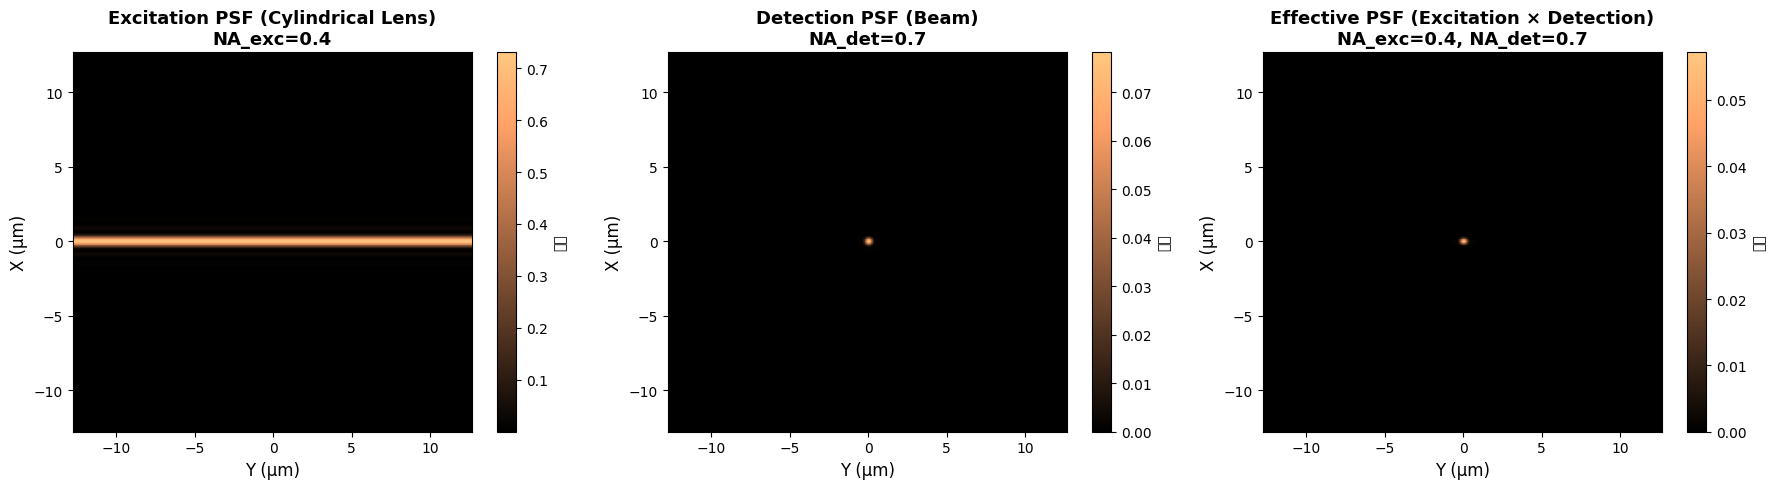

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Excitation PSF
vmax = slice_xy_excitation.max()
im1 = axes[0].imshow(slice_xy_excitation,
                     extent=[y_coords.min(), y_coords.max(),
                            x_coords.min(), x_coords.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax,
                     aspect='auto')
axes[0].set_xlabel('Y (μm)', fontsize=12)
axes[0].set_ylabel('X (μm)', fontsize=12)
axes[0].set_title(f'Excitation PSF (Cylindrical Lens)\nNA_exc={NA_excitation}', fontsize=13, fontweight='bold')
plt.colorbar(im1, ax=axes[0], label='强度')

# Detection PSF
vmax2 = slice_xy_detection.max()
im2 = axes[1].imshow(slice_xy_detection,
                     extent=[y_coords.min(), y_coords.max(),
                            x_coords.min(), x_coords.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax2,
                     aspect='auto')
axes[1].set_xlabel('Y (μm)', fontsize=12)
axes[1].set_ylabel('X (μm)', fontsize=12)
axes[1].set_title(f'Detection PSF (Beam)\nNA_det={NA_detection}', fontsize=13, fontweight='bold')
plt.colorbar(im2, ax=axes[1], label='强度')

# Effective PSF
vmax3 = slice_xy_effective.max()
im3 = axes[2].imshow(slice_xy_effective,
                     extent=[y_coords.min(), y_coords.max(),
                            x_coords.min(), x_coords.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax3,
                     aspect='auto')
axes[2].set_xlabel('Y (μm)', fontsize=12)
axes[2].set_ylabel('X (μm)', fontsize=12)
axes[2].set_title(f'Effective PSF (Excitation × Detection)\nNA_exc={NA_excitation}, NA_det={NA_detection}', fontsize=13, fontweight='bold')
plt.colorbar(im3, ax=axes[2], label='强度')

plt.tight_layout()
plt.show()


### 4.3 XZ 平面视图


C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1268825938.py:45: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1268825938.py:45: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


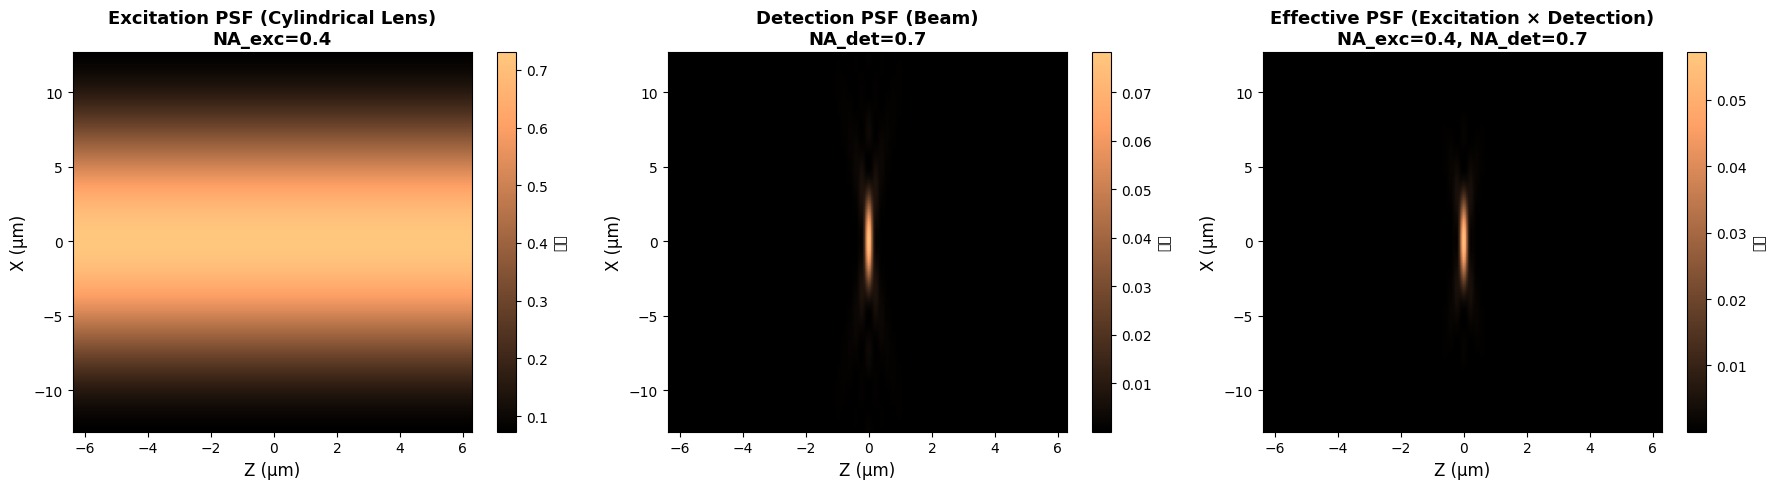

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Excitation PSF
vmax = slice_xz_excitation.max()
im1 = axes[0].imshow(slice_xz_excitation,
                     extent=[z_coords.min(), z_coords.max(),
                            x_coords.min(), x_coords.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax,
                     aspect='auto')
axes[0].set_xlabel('Z (μm)', fontsize=12)
axes[0].set_ylabel('X (μm)', fontsize=12)
axes[0].set_title(f'Excitation PSF (Cylindrical Lens)\nNA_exc={NA_excitation}', fontsize=13, fontweight='bold')
plt.colorbar(im1, ax=axes[0], label='强度')

# Detection PSF
vmax2 = slice_xz_detection.max()
im2 = axes[1].imshow(slice_xz_detection,
                     extent=[z_coords.min(), z_coords.max(),
                            x_coords.min(), x_coords.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax2,
                     aspect='auto')
axes[1].set_xlabel('Z (μm)', fontsize=12)
axes[1].set_ylabel('X (μm)', fontsize=12)
axes[1].set_title(f'Detection PSF (Beam)\nNA_det={NA_detection}', fontsize=13, fontweight='bold')
plt.colorbar(im2, ax=axes[1], label='强度')

# Effective PSF
vmax3 = slice_xz_effective.max()
im3 = axes[2].imshow(slice_xz_effective,
                     extent=[z_coords.min(), z_coords.max(),
                            x_coords.min(), x_coords.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax3,
                     aspect='auto')
axes[2].set_xlabel('Z (μm)', fontsize=12)
axes[2].set_ylabel('X (μm)', fontsize=12)
axes[2].set_title(f'Effective PSF (Excitation × Detection)\nNA_exc={NA_excitation}, NA_det={NA_detection}', fontsize=13, fontweight='bold')
plt.colorbar(im3, ax=axes[2], label='强度')

plt.tight_layout()
plt.show()


### 4.4 1D 轮廓图 - Y 方向（Cylindrical Lens 的聚焦方向）


C:\Users\11316\AppData\Local\Temp\ipykernel_26984\2733650986.py:27: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\2733650986.py:27: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\2733650986.py:27: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\2733650986.py:27: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\2733650986.py:27: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


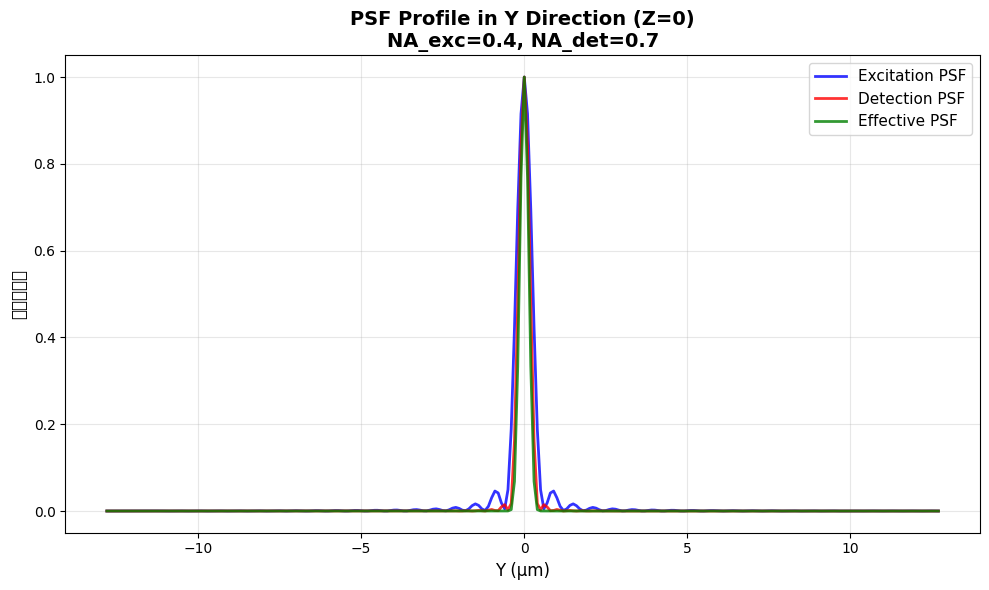

In [ ]:
# 提取中心线的 1D 轮廓
# slice_yz 形状是 (Nz, Ny)，所以：
# - Y 方向轮廓（固定 Z）：slice_yz[center_z_idx, :] 得到 (Ny,)
# - Z 方向轮廓（固定 Y）：slice_yz[:, center_y_idx] 得到 (Nz,)
center_z_idx = Nz // 2
center_y_idx = Ny // 2
center_x_idx = Nx // 2

# Y 方向的轮廓（在 YZ 平面，z=center_z）
profile_y_excitation = slice_yz_excitation[center_z_idx, :]
profile_y_detection = slice_yz_detection[center_z_idx, :]
profile_y_effective = slice_yz_effective[center_z_idx, :]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(y_coords, profile_y_excitation / profile_y_excitation.max(), 
        'b-', linewidth=2, label='Excitation PSF', alpha=0.8)
ax.plot(y_coords, profile_y_detection / profile_y_detection.max(), 
        'r-', linewidth=2, label='Detection PSF', alpha=0.8)
ax.plot(y_coords, profile_y_effective / profile_y_effective.max(), 
        'g-', linewidth=2, label='Effective PSF', alpha=0.8)

ax.set_xlabel('Y (μm)', fontsize=12)
ax.set_ylabel('归一化强度', fontsize=12)
ax.set_title(f'PSF Profile in Y Direction (Z=0)\nNA_exc={NA_excitation}, NA_det={NA_detection}', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 4.5 1D 轮廓图 - Z 方向（光轴方向）


C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1537819931.py:20: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1537819931.py:20: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1537819931.py:20: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1537819931.py:20: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1537819931.py:20: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


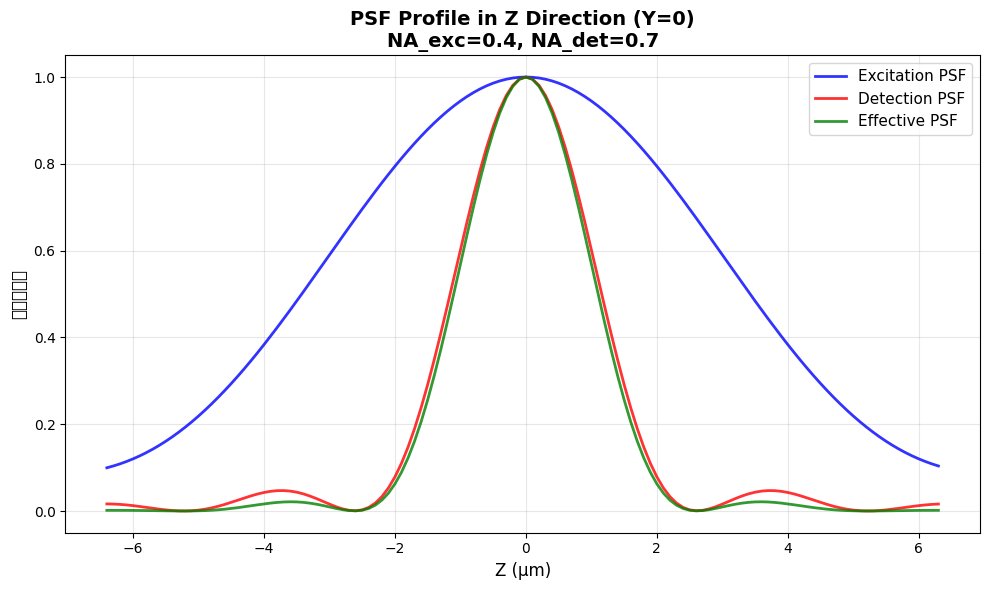

In [ ]:
# Z 方向的轮廓（在 YZ 平面，y=center_y）
# slice_yz 形状是 (Nz, Ny)，所以 Z 方向轮廓（固定 Y）是 slice_yz[:, center_y_idx]
profile_z_excitation = slice_yz_excitation[:, center_y_idx]
profile_z_detection = slice_yz_detection[:, center_y_idx]
profile_z_effective = slice_yz_effective[:, center_y_idx]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(z_coords, profile_z_excitation / profile_z_excitation.max(), 
        'b-', linewidth=2, label='Excitation PSF', alpha=0.8)
ax.plot(z_coords, profile_z_detection / profile_z_detection.max(), 
        'r-', linewidth=2, label='Detection PSF', alpha=0.8)
ax.plot(z_coords, profile_z_effective / profile_z_effective.max(), 
        'g-', linewidth=2, label='Effective PSF', alpha=0.8)

ax.set_xlabel('Z (μm)', fontsize=12)
ax.set_ylabel('归一化强度', fontsize=12)
ax.set_title(f'PSF Profile in Z Direction (Y=0)\nNA_exc={NA_excitation}, NA_det={NA_detection}', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 4.6 3D 等值面可视化（可选，需要 mayavi 或 plotly）

如果需要 3D 可视化，可以使用以下代码（需要安装额外的库）：


In [72]:
# 计算 FWHM (半高全宽) 来量化 PSF 尺寸
def calculate_fwhm(profile, coords):
    """计算 1D 轮廓的 FWHM"""
    max_val = profile.max()
    half_max = max_val / 2.0
    
    # 找到半高点的位置
    above_half = profile >= half_max
    if not above_half.any():
        return None
    
    indices = np.where(above_half)[0]
    if len(indices) == 0:
        return None
    
    left_idx = indices[0]
    right_idx = indices[-1]
    
    # 线性插值找到精确的 FWHM 位置
    if left_idx > 0:
        # 左侧插值
        y1, y2 = profile[left_idx-1], profile[left_idx]
        x1, x2 = coords[left_idx-1], coords[left_idx]
        left_pos = x1 + (half_max - y1) * (x2 - x1) / (y2 - y1) if y2 != y1 else x1
    else:
        left_pos = coords[left_idx]
    
    if right_idx < len(profile) - 1:
        # 右侧插值
        y1, y2 = profile[right_idx], profile[right_idx+1]
        x1, x2 = coords[right_idx], coords[right_idx+1]
        right_pos = x1 + (half_max - y1) * (x2 - x1) / (y2 - y1) if y2 != y1 else x1
    else:
        right_pos = coords[right_idx]
    
    return right_pos - left_pos

# 计算各个方向的 FWHM
fwhm_y_excitation = calculate_fwhm(profile_y_excitation, y_coords)
fwhm_z_excitation = calculate_fwhm(profile_z_excitation, z_coords)

fwhm_y_detection = calculate_fwhm(profile_y_detection, y_coords)
fwhm_z_detection = calculate_fwhm(profile_z_detection, z_coords)

fwhm_y_effective = calculate_fwhm(profile_y_effective, y_coords)
fwhm_z_effective = calculate_fwhm(profile_z_effective, z_coords)

print("=" * 60)
print("FWHM (半高全宽) 分析")
print("=" * 60)
print(f"\nExcitation PSF:")
print(f"  Y 方向 FWHM: {fwhm_y_excitation:.3f} μm")
print(f"  Z 方向 FWHM: {fwhm_z_excitation:.3f} μm")
print(f"\nDetection PSF:")
print(f"  Y 方向 FWHM: {fwhm_y_detection:.3f} μm")
print(f"  Z 方向 FWHM: {fwhm_z_detection:.3f} μm")
print(f"\nEffective PSF:")
print(f"  Y 方向 FWHM: {fwhm_y_effective:.3f} μm")
print(f"  Z 方向 FWHM: {fwhm_z_effective:.3f} μm")
print("=" * 60)


FWHM (半高全宽) 分析

Excitation PSF:
  Y 方向 FWHM: 0.543 μm
  Z 方向 FWHM: 6.848 μm

Detection PSF:
  Y 方向 FWHM: 0.389 μm
  Z 方向 FWHM: 2.316 μm

Effective PSF:
  Y 方向 FWHM: 0.323 μm
  Z 方向 FWHM: 2.205 μm


## 5. Effective PSF 放大视图

为了更好地观察 Effective PSF 的细节，我们展示中心区域的放大版本。


In [73]:
# 设置放大范围（微米）
zoom_range = 5.0  # 显示中心 ±5μm 的区域

# 计算放大区域的索引范围
# YZ 平面放大
y_zoom_mask = np.abs(y_coords) <= zoom_range
z_zoom_mask = np.abs(z_coords) <= zoom_range
slice_yz_zoom = slice_yz_effective[np.ix_(z_zoom_mask, y_zoom_mask)]
y_coords_zoom = y_coords[y_zoom_mask]
z_coords_zoom = z_coords[z_zoom_mask]

# XY 平面放大
x_zoom_mask = np.abs(x_coords) <= zoom_range
slice_xy_zoom = slice_xy_effective[np.ix_(y_zoom_mask, x_zoom_mask)]
x_coords_zoom = x_coords[x_zoom_mask]

# XZ 平面放大
slice_xz_zoom = slice_xz_effective[np.ix_(z_zoom_mask, x_zoom_mask)]

print(f"放大范围: ±{zoom_range} μm")
print(f"YZ 放大切片形状: {slice_yz_zoom.shape}")
print(f"XY 放大切片形状: {slice_xy_zoom.shape}")
print(f"XZ 放大切片形状: {slice_xz_zoom.shape}")


放大范围: ±5.0 μm
YZ 放大切片形状: (101, 101)
XY 放大切片形状: (101, 101)
XZ 放大切片形状: (101, 101)


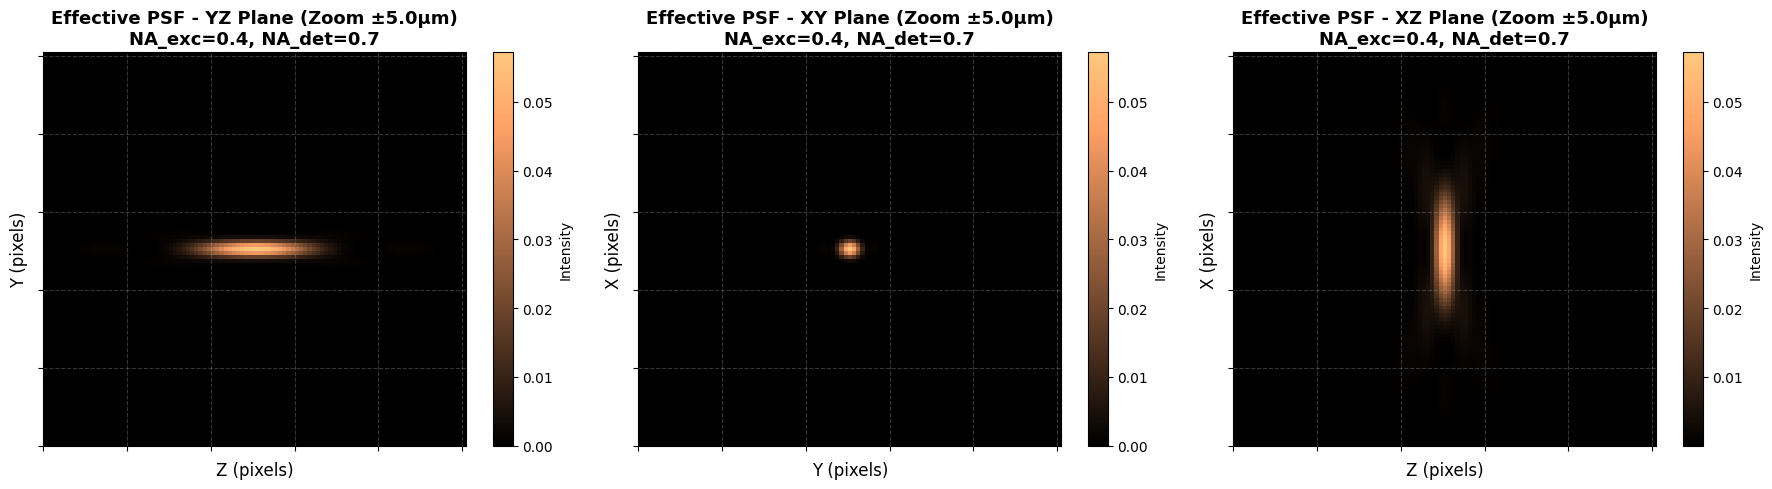

In [74]:
# 创建三个平面的放大视图（像素坐标，占据一半空间）
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 获取切片的像素尺寸
Nz_zoom, Ny_zoom = slice_yz_zoom.shape
Ny_zoom_xy, Nx_zoom_xy = slice_xy_zoom.shape
Nz_zoom_xz, Nx_zoom_xz = slice_xz_zoom.shape

# YZ 平面放大视图
vmax = slice_yz_zoom.max()
# extent设置为像素坐标，PSF占据一半（0到size/2）
im1 = axes[0].imshow(slice_yz_zoom.T,  # 转置以便 Z 在 x 轴，Y 在 y 轴
                     extent=[0, Nz_zoom/2, 0, Ny_zoom/2],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax,
                     aspect='auto')
axes[0].set_xlabel('Z (pixels)', fontsize=12)
axes[0].set_ylabel('Y (pixels)', fontsize=12)
axes[0].set_title(f'Effective PSF - YZ Plane (Zoom ±{zoom_range}μm)\nNA_exc={NA_excitation}, NA_det={NA_detection}', fontsize=13, fontweight='bold')
axes[0].set_xticklabels([])  # 去掉坐标轴文字
axes[0].set_yticklabels([])  # 去掉坐标轴文字
axes[0].grid(True, alpha=0.3, linestyle='--')
plt.colorbar(im1, ax=axes[0], label='Intensity')

# XY 平面放大视图
vmax2 = slice_xy_zoom.max()
# extent设置为像素坐标，PSF占据一半
im2 = axes[1].imshow(slice_xy_zoom,
                     extent=[0, Ny_zoom_xy/2, 0, Nx_zoom_xy/2],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax2,
                     aspect='auto')
axes[1].set_xlabel('Y (pixels)', fontsize=12)
axes[1].set_ylabel('X (pixels)', fontsize=12)
axes[1].set_title(f'Effective PSF - XY Plane (Zoom ±{zoom_range}μm)\nNA_exc={NA_excitation}, NA_det={NA_detection}', fontsize=13, fontweight='bold')
axes[1].set_xticklabels([])  # 去掉坐标轴文字
axes[1].set_yticklabels([])  # 去掉坐标轴文字
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.colorbar(im2, ax=axes[1], label='Intensity')

# XZ 平面放大视图
vmax3 = slice_xz_zoom.max()
# extent设置为像素坐标，PSF占据一半
im3 = axes[2].imshow(slice_xz_zoom,
                     extent=[0, Nz_zoom_xz/2, 0, Nx_zoom_xz/2],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax3,
                     aspect='auto')
axes[2].set_xlabel('Z (pixels)', fontsize=12)
axes[2].set_ylabel('X (pixels)', fontsize=12)
axes[2].set_title(f'Effective PSF - XZ Plane (Zoom ±{zoom_range}μm)\nNA_exc={NA_excitation}, NA_det={NA_detection}', fontsize=13, fontweight='bold')
axes[2].set_xticklabels([])  # 去掉坐标轴文字
axes[2].set_yticklabels([])  # 去掉坐标轴文字
axes[2].grid(True, alpha=0.3, linestyle='--')
plt.colorbar(im3, ax=axes[2], label='Intensity')

plt.tight_layout()
plt.show()


C:\Users\11316\AppData\Local\Temp\ipykernel_26984\3728839180.py:58: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\3728839180.py:58: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Application\Miniconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Application\Miniconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


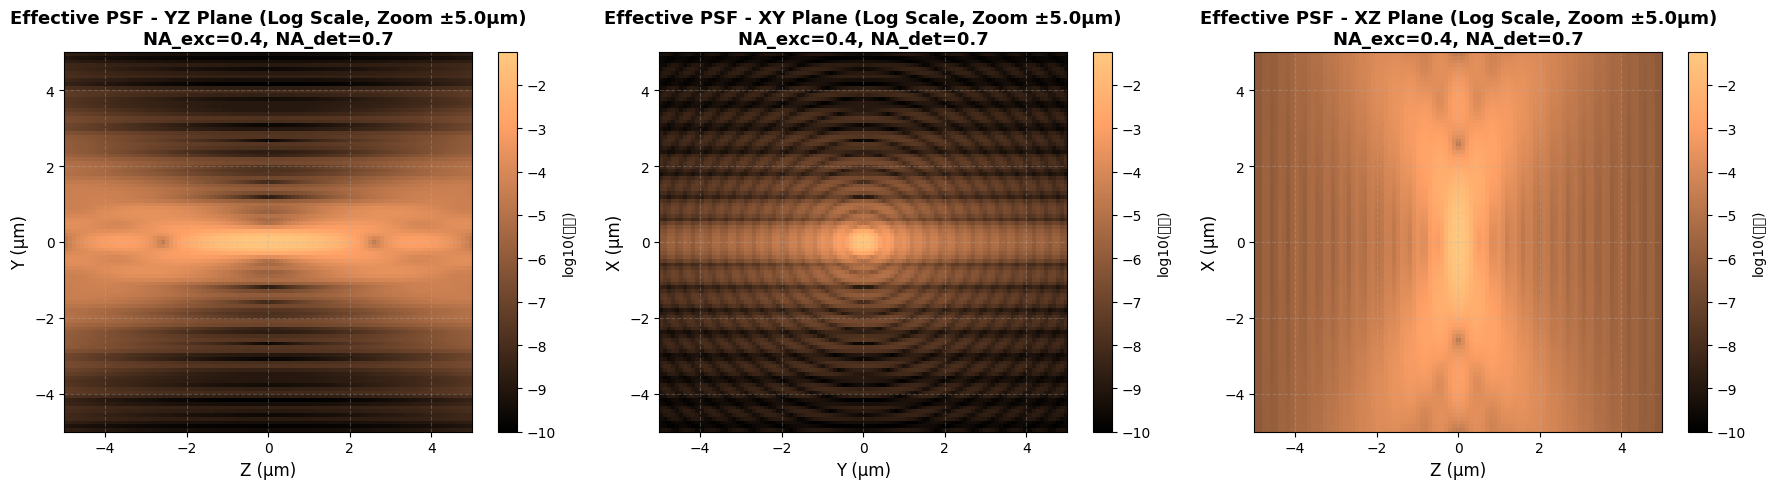

In [ ]:
# 更详细的放大视图 - 使用对数刻度显示
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 使用对数刻度以便更好地显示细节
eps = 1e-10  # 避免 log(0)

# YZ 平面对数刻度
vmax = slice_yz_zoom.max()
im1 = axes[0].imshow(np.log10(slice_yz_zoom.T + eps),
                     extent=[z_coords_zoom.min(), z_coords_zoom.max(),
                            y_coords_zoom.min(), y_coords_zoom.max()],
                     origin='lower',
                     cmap='copper',
                     vmin=np.log10(eps),
                     vmax=np.log10(vmax + eps),
                     aspect='auto')
axes[0].set_xlabel('Z (μm)', fontsize=12)
axes[0].set_ylabel('Y (μm)', fontsize=12)
axes[0].set_title(f'Effective PSF - YZ Plane (Log Scale, Zoom ±{zoom_range}μm)\nNA_exc={NA_excitation}, NA_det={NA_detection}', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label('log10(强度)', fontsize=10)

# XY 平面对数刻度
vmax2 = slice_xy_zoom.max()
im2 = axes[1].imshow(np.log10(slice_xy_zoom + eps),
                     extent=[y_coords_zoom.min(), y_coords_zoom.max(),
                            x_coords_zoom.min(), x_coords_zoom.max()],
                     origin='lower',
                     cmap='copper',
                     vmin=np.log10(eps),
                     vmax=np.log10(vmax2 + eps),
                     aspect='auto')
axes[1].set_xlabel('Y (μm)', fontsize=12)
axes[1].set_ylabel('X (μm)', fontsize=12)
axes[1].set_title(f'Effective PSF - XY Plane (Log Scale, Zoom ±{zoom_range}μm)\nNA_exc={NA_excitation}, NA_det={NA_detection}', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')
cbar2 = plt.colorbar(im2, ax=axes[1])
cbar2.set_label('log10(强度)', fontsize=10)

# XZ 平面对数刻度
vmax3 = slice_xz_zoom.max()
im3 = axes[2].imshow(np.log10(slice_xz_zoom + eps),
                     extent=[z_coords_zoom.min(), z_coords_zoom.max(),
                            x_coords_zoom.min(), x_coords_zoom.max()],
                     origin='lower',
                     cmap='copper',
                     vmin=np.log10(eps),
                     vmax=np.log10(vmax3 + eps),
                     aspect='auto')
axes[2].set_xlabel('Z (μm)', fontsize=12)
axes[2].set_ylabel('X (μm)', fontsize=12)
axes[2].set_title(f'Effective PSF - XZ Plane (Log Scale, Zoom ±{zoom_range}μm)\nNA_exc={NA_excitation}, NA_det={NA_detection}', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3, linestyle='--')
cbar3 = plt.colorbar(im3, ax=axes[2])
cbar3.set_label('log10(强度)', fontsize=10)

plt.tight_layout()
plt.show()


## 6. 减小光片厚度后的 Effective PSF

通过增加激发数值孔径（NA）来减小光片厚度，然后重新计算并显示 Effective PSF 的放大视图。


In [76]:
# 减小光片厚度：增加激发数值孔径
NA_excitation_thin = 0.6  # 从 0.4 增加到 0.6，使光片更薄

print("=" * 60)
print("重新计算 PSF（减小光片厚度）")
print("=" * 60)
print(f"原始激发 NA: {NA_excitation}")
print(f"新的激发 NA: {NA_excitation_thin}")
print(f"检测 NA: {NA_detection} (保持不变)")
print("=" * 60)

# 重新计算 Excitation PSF（更薄的光片）
print("\n正在计算新的 Excitation PSF (更薄的光片)...")
psf_excitation_thin = focus_field_cylindrical(
    shape=shape,
    units=units,
    lam=lam_excitation,
    NA=NA_excitation_thin,
    n0=n0,
    return_all_fields=False,
    n_integration_steps=200
)

print(f"新的 Excitation PSF 形状: {psf_excitation_thin.shape}")
print(f"新的 Excitation PSF 最大值: {psf_excitation_thin.max():.4f}")

# 重新计算 Effective PSF
psf_effective_thin = psf_excitation_thin * psf_detection

print(f"\n新的 Effective PSF 形状: {psf_effective_thin.shape}")
print(f"新的 Effective PSF 最大值: {psf_effective_thin.max():.4f}")
print(f"原始 Effective PSF 最大值: {psf_effective.max():.4f}")


c:\Application\Miniconda\Lib\site-packages\pyopencl\cache.py:496: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(


重新计算 PSF（减小光片厚度）
原始激发 NA: 0.4
新的激发 NA: 0.6
检测 NA: 0.7 (保持不变)

正在计算新的 Excitation PSF (更薄的光片)...
time in secs: 0.17957282066345215
新的 Excitation PSF 形状: (128, 256, 256)
新的 Excitation PSF 最大值: 1.6449

新的 Effective PSF 形状: (128, 256, 256)
新的 Effective PSF 最大值: 0.1288
原始 Effective PSF 最大值: 0.0572


In [77]:
# 提取更薄光片的切片
# YZ 平面
slice_yz_effective_thin = psf_effective_thin[:, :, center_x]
# XY 平面
slice_xy_effective_thin = psf_effective_thin[center_z, :, :]
# XZ 平面
slice_xz_effective_thin = psf_effective_thin[:, center_y, :]

# 计算放大区域（使用相同的放大范围）
y_zoom_mask = np.abs(y_coords) <= zoom_range
z_zoom_mask = np.abs(z_coords) <= zoom_range
x_zoom_mask = np.abs(x_coords) <= zoom_range

# YZ 平面放大
slice_yz_zoom_thin = slice_yz_effective_thin[np.ix_(z_zoom_mask, y_zoom_mask)]
# XY 平面放大
slice_xy_zoom_thin = slice_xy_effective_thin[np.ix_(y_zoom_mask, x_zoom_mask)]
# XZ 平面放大
slice_xz_zoom_thin = slice_xz_effective_thin[np.ix_(z_zoom_mask, x_zoom_mask)]

print("更薄光片的放大切片已准备完成")


更薄光片的放大切片已准备完成


C:\Users\11316\AppData\Local\Temp\ipykernel_26984\2236015549.py:52: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\2236015549.py:52: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


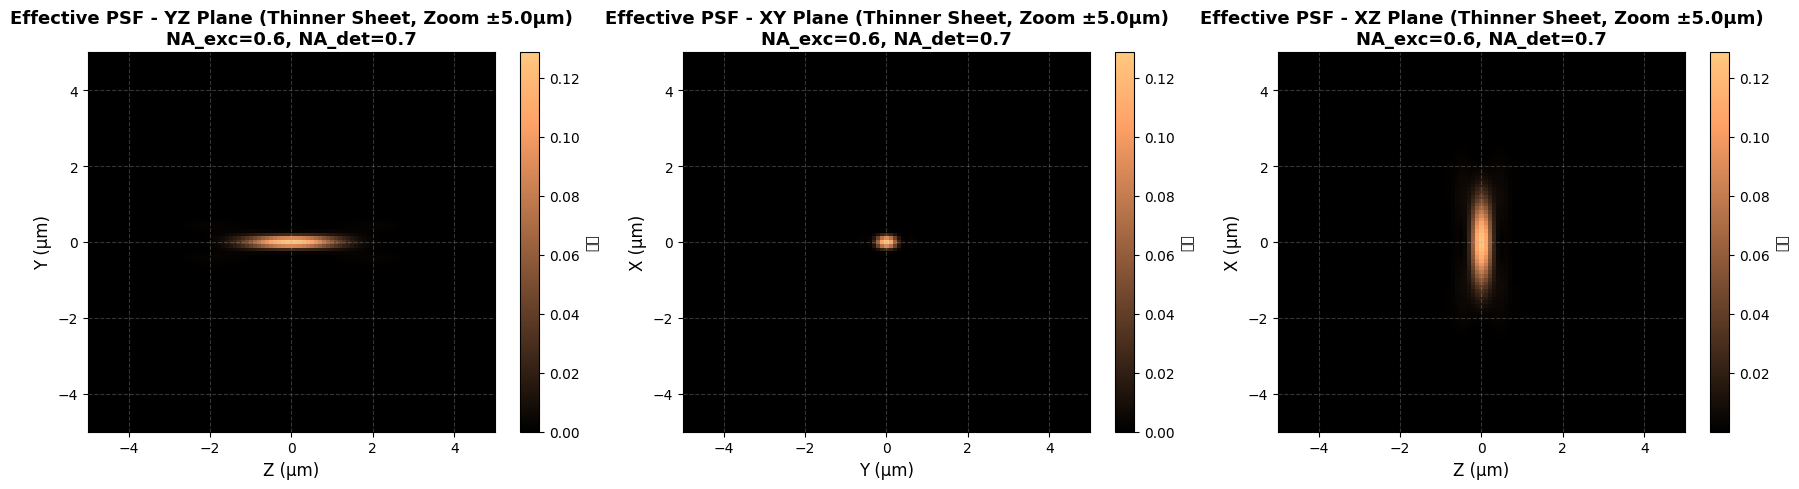

In [78]:
# 显示更薄光片的 Effective PSF 放大视图（线性刻度）
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# YZ 平面放大视图
vmax = slice_yz_zoom_thin.max()
im1 = axes[0].imshow(slice_yz_zoom_thin.T,
                     extent=[z_coords_zoom.min(), z_coords_zoom.max(),
                            y_coords_zoom.min(), y_coords_zoom.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax,
                     aspect='auto')
axes[0].set_xlabel('Z (μm)', fontsize=12)
axes[0].set_ylabel('Y (μm)', fontsize=12)
axes[0].set_title(f'Effective PSF - YZ Plane (Thinner Sheet, Zoom ±{zoom_range}μm)\nNA_exc={NA_excitation_thin}, NA_det={NA_detection}', 
                  fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
plt.colorbar(im1, ax=axes[0], label='强度')

# XY 平面放大视图
vmax2 = slice_xy_zoom_thin.max()
im2 = axes[1].imshow(slice_xy_zoom_thin,
                     extent=[y_coords_zoom.min(), y_coords_zoom.max(),
                            x_coords_zoom.min(), x_coords_zoom.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax2,
                     aspect='auto')
axes[1].set_xlabel('Y (μm)', fontsize=12)
axes[1].set_ylabel('X (μm)', fontsize=12)
axes[1].set_title(f'Effective PSF - XY Plane (Thinner Sheet, Zoom ±{zoom_range}μm)\nNA_exc={NA_excitation_thin}, NA_det={NA_detection}', 
                  fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.colorbar(im2, ax=axes[1], label='强度')

# XZ 平面放大视图
vmax3 = slice_xz_zoom_thin.max()
im3 = axes[2].imshow(slice_xz_zoom_thin,
                     extent=[z_coords_zoom.min(), z_coords_zoom.max(),
                            x_coords_zoom.min(), x_coords_zoom.max()],
                     origin='lower',
                     cmap='copper',
                     vmax=vmax3,
                     aspect='auto')
axes[2].set_xlabel('Z (μm)', fontsize=12)
axes[2].set_ylabel('X (μm)', fontsize=12)
axes[2].set_title(f'Effective PSF - XZ Plane (Thinner Sheet, Zoom ±{zoom_range}μm)\nNA_exc={NA_excitation_thin}, NA_det={NA_detection}', 
                  fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3, linestyle='--')
plt.colorbar(im3, ax=axes[2], label='强度')

plt.tight_layout()
plt.show()


C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1489568219.py:60: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1489568219.py:60: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


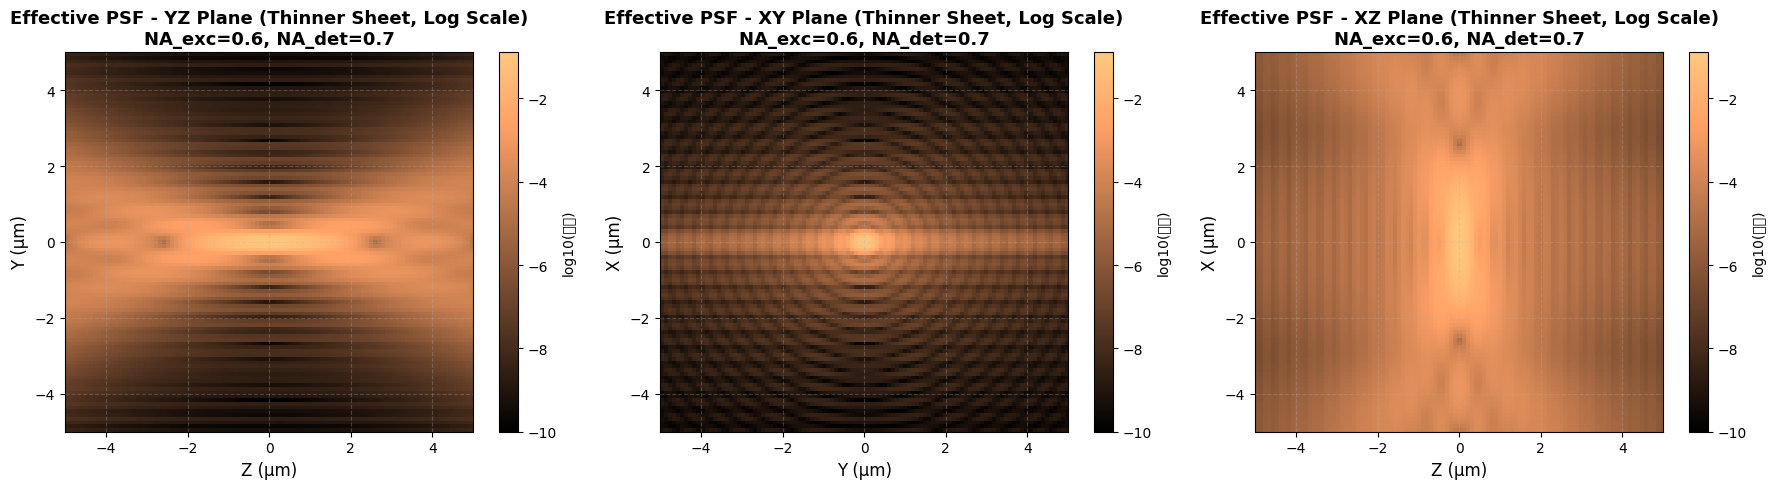

In [79]:
# 显示更薄光片的 Effective PSF 放大视图（对数刻度）
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

eps = 1e-10

# YZ 平面对数刻度
vmax = slice_yz_zoom_thin.max()
im1 = axes[0].imshow(np.log10(slice_yz_zoom_thin.T + eps),
                     extent=[z_coords_zoom.min(), z_coords_zoom.max(),
                            y_coords_zoom.min(), y_coords_zoom.max()],
                     origin='lower',
                     cmap='copper',
                     vmin=np.log10(eps),
                     vmax=np.log10(vmax + eps),
                     aspect='auto')
axes[0].set_xlabel('Z (μm)', fontsize=12)
axes[0].set_ylabel('Y (μm)', fontsize=12)
axes[0].set_title(f'Effective PSF - YZ Plane (Thinner Sheet, Log Scale)\nNA_exc={NA_excitation_thin}, NA_det={NA_detection}', 
                  fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label('log10(强度)', fontsize=10)

# XY 平面对数刻度
vmax2 = slice_xy_zoom_thin.max()
im2 = axes[1].imshow(np.log10(slice_xy_zoom_thin + eps),
                     extent=[y_coords_zoom.min(), y_coords_zoom.max(),
                            x_coords_zoom.min(), x_coords_zoom.max()],
                     origin='lower',
                     cmap='copper',
                     vmin=np.log10(eps),
                     vmax=np.log10(vmax2 + eps),
                     aspect='auto')
axes[1].set_xlabel('Y (μm)', fontsize=12)
axes[1].set_ylabel('X (μm)', fontsize=12)
axes[1].set_title(f'Effective PSF - XY Plane (Thinner Sheet, Log Scale)\nNA_exc={NA_excitation_thin}, NA_det={NA_detection}', 
                  fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')
cbar2 = plt.colorbar(im2, ax=axes[1])
cbar2.set_label('log10(强度)', fontsize=10)

# XZ 平面对数刻度
vmax3 = slice_xz_zoom_thin.max()
im3 = axes[2].imshow(np.log10(slice_xz_zoom_thin + eps),
                     extent=[z_coords_zoom.min(), z_coords_zoom.max(),
                            x_coords_zoom.min(), x_coords_zoom.max()],
                     origin='lower',
                     cmap='copper',
                     vmin=np.log10(eps),
                     vmax=np.log10(vmax3 + eps),
                     aspect='auto')
axes[2].set_xlabel('Z (μm)', fontsize=12)
axes[2].set_ylabel('X (μm)', fontsize=12)
axes[2].set_title(f'Effective PSF - XZ Plane (Thinner Sheet, Log Scale)\nNA_exc={NA_excitation_thin}, NA_det={NA_detection}', 
                  fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3, linestyle='--')
cbar3 = plt.colorbar(im3, ax=axes[2])
cbar3.set_label('log10(强度)', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1121693068.py:37: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1121693068.py:37: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1121693068.py:37: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1121693068.py:37: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1121693068.py:37: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_26984\1121693068.py:37: UserWarning: Glyph 21407 (\

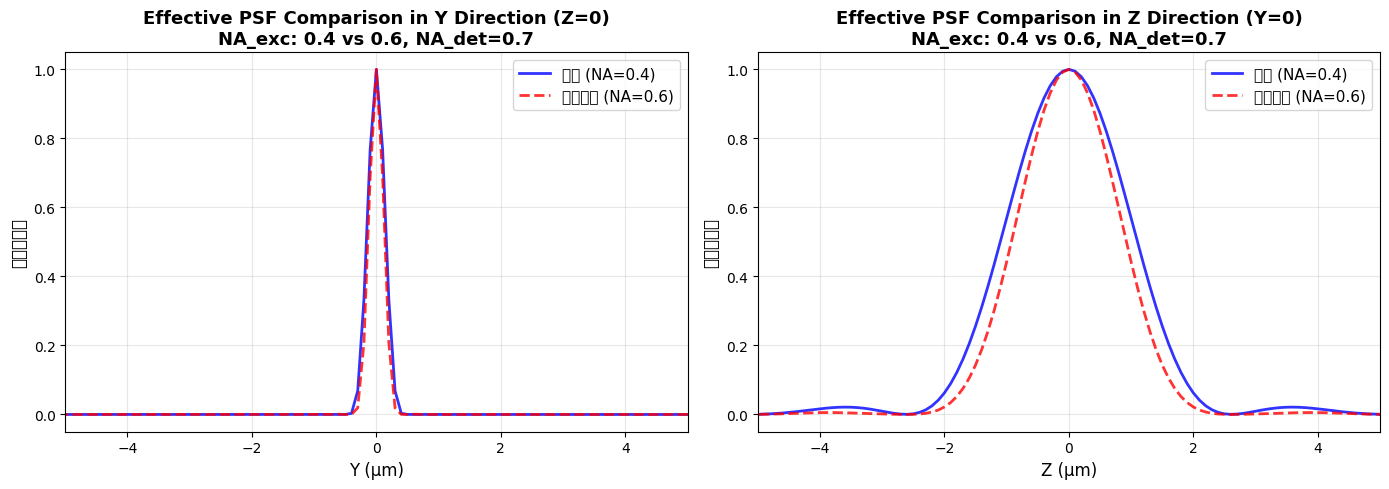

FWHM 对比分析

原始 Effective PSF (NA=0.4):
  Y 方向 FWHM: 0.323 μm
  Z 方向 FWHM: 2.205 μm

更薄光片 Effective PSF (NA=0.6):
  Y 方向 FWHM: 0.279 μm
  Z 方向 FWHM: 1.850 μm

改进:
  Y 方向 FWHM 变化: -0.045 μm (-13.9%)
  Z 方向 FWHM 变化: -0.355 μm (-16.1%)


In [ ]:
# 对比原始和更薄光片的 Effective PSF
# 提取 1D 轮廓进行对比
center_z_idx = Nz // 2
center_y_idx = Ny // 2

# Y 方向轮廓对比
profile_y_effective_thin = slice_yz_effective_thin[center_z_idx, :]
# Z 方向轮廓对比
profile_z_effective_thin = slice_yz_effective_thin[:, center_y_idx]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Y 方向对比
axes[0].plot(y_coords, profile_y_effective / profile_y_effective.max(), 
             'b-', linewidth=2, label=f'原始 (NA={NA_excitation})', alpha=0.8)
axes[0].plot(y_coords, profile_y_effective_thin / profile_y_effective_thin.max(), 
             'r--', linewidth=2, label=f'更薄光片 (NA={NA_excitation_thin})', alpha=0.8)
axes[0].set_xlabel('Y (μm)', fontsize=12)
axes[0].set_ylabel('归一化强度', fontsize=12)
axes[0].set_title(f'Effective PSF Comparison in Y Direction (Z=0)\nNA_exc: {NA_excitation} vs {NA_excitation_thin}, NA_det={NA_detection}', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-zoom_range, zoom_range)  # 放大视图范围

# Z 方向对比
axes[1].plot(z_coords, profile_z_effective / profile_z_effective.max(), 
             'b-', linewidth=2, label=f'原始 (NA={NA_excitation})', alpha=0.8)
axes[1].plot(z_coords, profile_z_effective_thin / profile_z_effective_thin.max(), 
             'r--', linewidth=2, label=f'更薄光片 (NA={NA_excitation_thin})', alpha=0.8)
axes[1].set_xlabel('Z (μm)', fontsize=12)
axes[1].set_ylabel('归一化强度', fontsize=12)
axes[1].set_title(f'Effective PSF Comparison in Z Direction (Y=0)\nNA_exc: {NA_excitation} vs {NA_excitation_thin}, NA_det={NA_detection}', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-zoom_range, zoom_range)  # 放大视图范围

plt.tight_layout()
plt.show()

# 计算更薄光片的 FWHM
fwhm_y_effective_thin = calculate_fwhm(profile_y_effective_thin, y_coords)
fwhm_z_effective_thin = calculate_fwhm(profile_z_effective_thin, z_coords)

print("=" * 60)
print("FWHM 对比分析")
print("=" * 60)
print(f"\n原始 Effective PSF (NA={NA_excitation}):")
print(f"  Y 方向 FWHM: {fwhm_y_effective:.3f} μm")
print(f"  Z 方向 FWHM: {fwhm_z_effective:.3f} μm")
print(f"\n更薄光片 Effective PSF (NA={NA_excitation_thin}):")
print(f"  Y 方向 FWHM: {fwhm_y_effective_thin:.3f} μm")
print(f"  Z 方向 FWHM: {fwhm_z_effective_thin:.3f} μm")
print(f"\n改进:")
print(f"  Y 方向 FWHM 变化: {fwhm_y_effective_thin - fwhm_y_effective:.3f} μm ({((fwhm_y_effective_thin - fwhm_y_effective) / fwhm_y_effective * 100):+.1f}%)")
print(f"  Z 方向 FWHM 变化: {fwhm_z_effective_thin - fwhm_z_effective:.3f} μm ({((fwhm_z_effective_thin - fwhm_z_effective) / fwhm_z_effective * 100):+.1f}%)")
print("=" * 60)


## 总结


## 总结

本 notebook 展示了 cylindrical lens lightsheet 成像系统的三个关键 PSF：

1. **Excitation PSF**: 使用圆柱透镜产生的激发光片，在 YZ 平面内形成细长的光片
2. **Detection PSF**: 使用普通光束的检测 PSF，通常具有更好的轴向分辨率
3. **Effective PSF**: 两者的乘积，决定了最终成像系统的分辨率

Cylindrical lens 的特点是在一个方向（Y 方向）聚焦，而在另一个方向（X 方向）保持准直，从而形成光片照明。
